In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.summary import summary_iterator
import pdb

In [2]:

def get_section_results_orig(file):
    
    X = []
    Y = []
    b_loss = []
    
    for i in tf.compat.v1.train.summary_iterator(file):
        for val in i.summary.value:
            if val.tag == 'train_return':
                X.append(val.simple_value)
            elif val.tag == 'eval_return':
                Y.append(val.simple_value)
            elif val.tag == 'Baseline_Loss':
                b_loss.append(val.simple_value)

            
    return X, Y, b_loss

In [3]:
def get_section_results(file):
    
    
    # Initialize an empty dictionary to store tag data
    tag_data = {}
    
    for summary in summary_iterator.summary_iterator(file):
        for value in summary.summary.value:
            tag = value.tag
            val = value.simple_value
            if tag not in tag_data:
                tag_data[tag] = []
    
            tag_data[tag].append(val)
    return tag_data


In [237]:
# DQN and double DQN -- lunarlander
fnames = {}
fnames['DQN-cartpole'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_17-10-2023_16-15-57/events.out.tfevents.1697584557.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-lr'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_17-10-2023_16-12-38/events.out.tfevents.1697584358.MacBook-Pro-108.ucsfmedicalcenter.org'

fnames['DQN-cartpole-double-dqn'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_doubleq_17-10-2023_17-21-05/events.out.tfevents.1697588465.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-double-dqn-lr'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_doubleq_17-10-2023_17-32-40/events.out.tfevents.1697589160.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-low-discount'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.8_17-10-2023_17-21-42/events.out.tfevents.1697588502.MacBook-Pro-108.ucsfmedicalcenter.org'



fnames['DQN1'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_16-25-42/events.out.tfevents.1697325942.MacBook-Pro-108.attlocal.net'
fnames['DQN2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_16-33-20/events.out.tfevents.1697326400.MacBook-Pro-108.attlocal.net'
fnames['DQN3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_17-06-13/events.out.tfevents.1697328373.MacBook-Pro-108.attlocal.net'

fnames['DoubleDQN1']= '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_16-29-53/events.out.tfevents.1697326193.MacBook-Pro-108.attlocal.net'
fnames['DoubleDQN2']= '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_16-37-38/events.out.tfevents.1697326658.MacBook-Pro-108.attlocal.net'
fnames['DoubleDQN3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_17-06-09/events.out.tfevents.1697328369.MacBook-Pro-108.attlocal.net'

fnames['mspacman'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_14-10-2023_18-22-28/events.out.tfevents.1697332948.MacBook-Pro-108.attlocal.net'


# SAC
fnames['SAC_pendulum'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_pendulum_Pendulum-v1_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_13-45-04/events.out.tfevents.1697489104.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reinforce'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reinforce_InvertedPendulum-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_14-00-22/events.out.tfevents.1697490022.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reparam_new'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_14-45-06/events.out.tfevents.1697492706.MacBook-Pro-108.attlocal.net'

fnames['SAC_hopper_singleq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_16-10-2023_15-08-24/events.out.tfevents.1697494104.MacBook-Pro-108.attlocal.net'
fnames['SAC_hopper_doubleq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_16-10-2023_18-39-09/events.out.tfevents.1697506749.MacBook-Pro-108.attlocal.net'
fnames['SAC_hopper_clipq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_16-10-2023_18-38-14/events.out.tfevents.1697506694.MacBook-Pro-108.attlocal.net'

fnames['SAC_half_cheetah_reinforce10'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_16-10-2023_19-02-45/events.out.tfevents.1697508165.MacBook-Pro-108.attlocal.net'
fnames['SAC_half_cheetah_reinforce1'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_16-10-2023_19-02-21/events.out.tfevents.1697508141.MacBook-Pro-108.attlocal.net'
fnames['SAC_half_cheetah_reparam'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reparametrize_HalfCheetah-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_stu0.005_16-10-2023_19-01-43/events.out.tfevents.1697508103.MacBook-Pro-108.attlocal.net'

fnames['humanoid_pg'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/events.out.tfevents.cs285-solutuions'
fnames['humanoid_ac'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_humanoid_Humanoid-v4_reparametrize_s256_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_17-10-2023_00-59-02/events.out.tfevents.1697529542.MacBook-Pro-108.attlocal.net'
# deprecated
fnames['SAC_invpendulum_reinforce_old'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reinforce_InvertedPendulum-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_15-10-2023_16-12-57/events.out.tfevents.1697411577.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reparam'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_14-15-13/events.out.tfevents.1697490913.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reparam_old'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_15-10-2023_16-34-34/events.out.tfevents.1697412874.MacBook-Pro-108.attlocal.net'
fnames['SAC_hopper_doubleq_old2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_16-10-2023_15-08-34/events.out.tfevents.1697494114.MacBook-Pro-108.attlocal.net'
fnames['SAC_hopper_doubleq_old'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_16-10-2023_18-24-47/events.out.tfevents.1697505887.MacBook-Pro-108.attlocal.net'



tag_data = {}
for key in fnames.keys():
    tag_data[key] = get_section_results(fnames[key]) 
fnames.keys()

dict_keys(['DQN-cartpole', 'DQN-cartpole-lr', 'DQN-cartpole-double-dqn', 'DQN-cartpole-double-dqn-lr', 'DQN-cartpole-low-discount', 'DQN1', 'DQN2', 'DQN3', 'DoubleDQN1', 'DoubleDQN2', 'DoubleDQN3', 'mspacman', 'SAC_pendulum', 'SAC_invpendulum_reinforce', 'SAC_invpendulum_reparam_new', 'SAC_hopper_singleq', 'SAC_hopper_doubleq', 'SAC_hopper_clipq', 'SAC_half_cheetah_reinforce10', 'SAC_half_cheetah_reinforce1', 'SAC_half_cheetah_reparam', 'humanoid_pg', 'humanoid_ac', 'SAC_invpendulum_reinforce_old', 'SAC_invpendulum_reparam', 'SAC_invpendulum_reparam_old', 'SAC_hopper_doubleq_old2', 'SAC_hopper_doubleq_old'])

## DQN results

Text(0.5, 1.0, 'DQN Cartpole result')

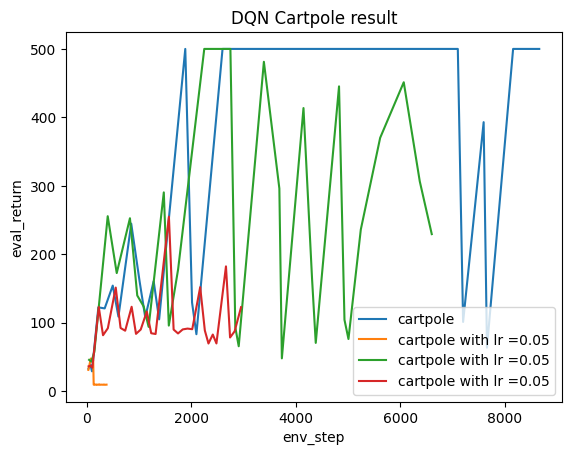

In [57]:
To_plot = 'eval_return'
plt.plot(np.cumsum(tag_data['DQN-cartpole'][To_plot]),tag_data['DQN-cartpole'][To_plot],label='cartpole')
plt.plot(np.cumsum(tag_data['DQN-cartpole-lr'][To_plot]),tag_data['DQN-cartpole-lr'][To_plot],label='cartpole with lr =0.05')
plt.plot(np.cumsum(tag_data['DQN-cartpole-double-dqn'][To_plot]),tag_data['DQN-cartpole-double-dqn'][To_plot],label='cartpole with lr =0.05')
plt.plot(np.cumsum(tag_data['DQN-cartpole-low-discount'][To_plot]),tag_data['DQN-cartpole-low-discount'][To_plot],label='cartpole with lr =0.05')
plt.xlabel('env_step')
plt.ylabel('eval_return')
plt.legend()
plt.title('DQN Cartpole result')

Text(0.5, 1.0, 'DQN Cartpole result')

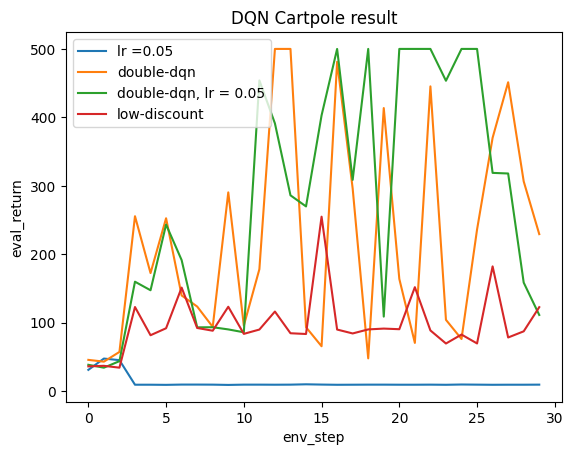

In [63]:
To_plot = 'eval_return'
plt.plot(tag_data['DQN-cartpole'][To_plot],label='single-dqn')
plt.plot(tag_data['DQN-cartpole-lr'][To_plot],label='lr =0.05')
plt.plot(tag_data['DQN-cartpole-double-dqn'][To_plot],label='double-dqn')
plt.plot(tag_data['DQN-cartpole-double-dqn-lr'][To_plot],label='double-dqn, lr = 0.05')
plt.plot(tag_data['DQN-cartpole-low-discount'][To_plot],label='low-discount')
plt.xlabel('env_step')
plt.ylabel('eval_return')
plt.legend()
plt.title('DQN Cartpole result')

Text(0.5, 1.0, 'DQN Cartpole result')

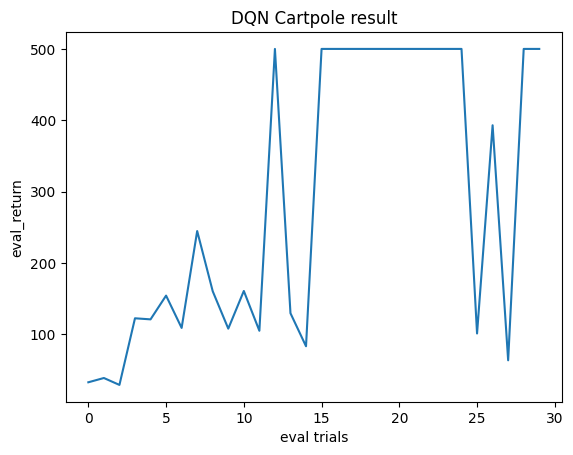

In [29]:
To_plot = 'eval_return'
plt.plot(tag_data['DQN-cartpole'][To_plot],label='cartpole')
#plt.plot(tag_data['DQN-cartpole-lr'][To_plot],label='cartpole')
plt.xlabel('eval trials')
plt.ylabel('eval_return')
plt.title('DQN Cartpole result')

In [21]:
tag_data['DQN-cartpole-lr'].keys()

dict_keys(['eval_return', 'eval_ep_len', 'eval/return_std', 'eval/return_max', 'eval/return_min', 'eval/ep_len_std', 'eval/ep_len_max', 'eval/ep_len_min', 'train_return', 'train_ep_len', 'critic_loss', 'q_values', 'target_values', 'grad_norm', 'epsilon', 'lr'])

Text(0.5, 1.0, 'DQN Cartpole result')

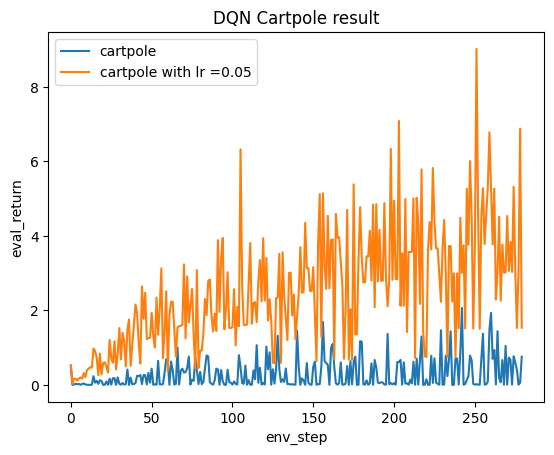

In [27]:
To_plot = 'critic_loss'
#To_plot = 'q_values'
plt.plot(tag_data['DQN-cartpole'][To_plot],label='cartpole')
plt.plot(tag_data['DQN-cartpole-lr'][To_plot],label='cartpole with lr =0.05')
plt.xlabel('env_step')
plt.ylabel('eval_return')
plt.legend()
plt.title('DQN Cartpole result')

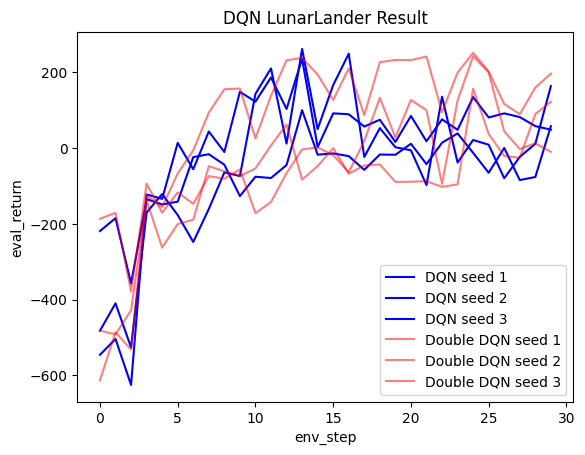

In [171]:
To_plot = 'eval_return'
plt.plot(tag_data['DQN1'][To_plot], label='DQN seed 1', color='blue')
plt.plot(tag_data['DQN2'][To_plot], label='DQN seed 2', color='blue')
plt.plot(tag_data['DQN3'][To_plot], label='DQN seed 3', color='blue')

plt.plot(tag_data['DoubleDQN1'][To_plot], alpha=0.5, label='Double DQN seed 1', color='red')
plt.plot(tag_data['DoubleDQN2'][To_plot], alpha=0.5, label='Double DQN seed 2', color='red')
plt.plot(tag_data['DoubleDQN3'][To_plot], alpha=0.5, label='Double DQN seed 3', color='red')

plt.xlabel('env_step')
plt.ylabel('eval_return')
plt.title('DQN LunarLander Result')

plt.legend()

Text(0.5, 1.0, 'DQN ms pacman Result')

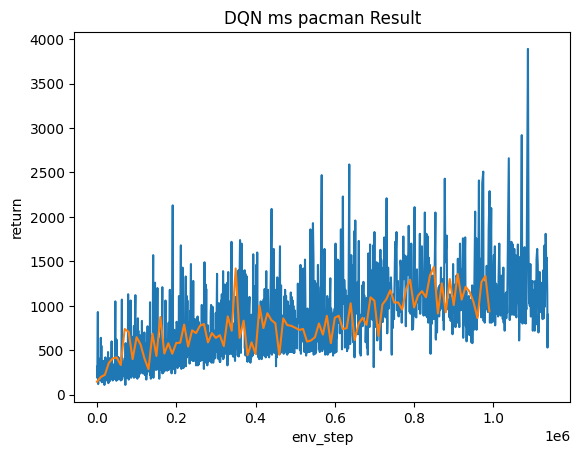

In [32]:
plt.plot(np.cumsum(tag_data['mspacman']['train_return']),tag_data['mspacman']['train_return'])
plt.plot(10000*np.arange(100), tag_data['mspacman']['eval_return'], label='eval_return')
#plt.xlim([0,1e6])
plt.xlabel('env_step')
plt.ylabel('return')
plt.title('DQN ms pacman Result')

## SAC results

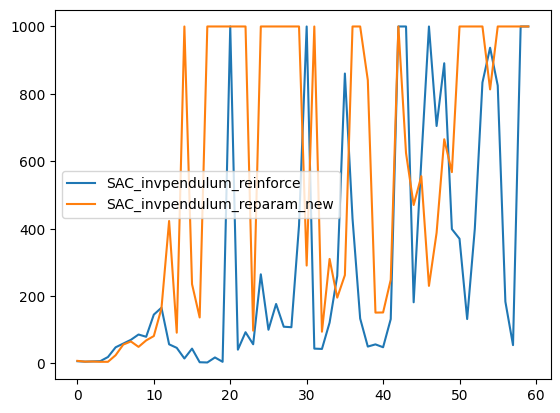

In [152]:
plt.plot(tag_data['SAC_invpendulum_reinforce']['eval_return'],label='SAC_invpendulum_reinforce')
plt.plot(tag_data['SAC_invpendulum_reparam_new']['eval_return'],label='SAC_invpendulum_reparam_new')
plt.legend()

Text(0.5, 1.0, 'SAC half-cheetah')

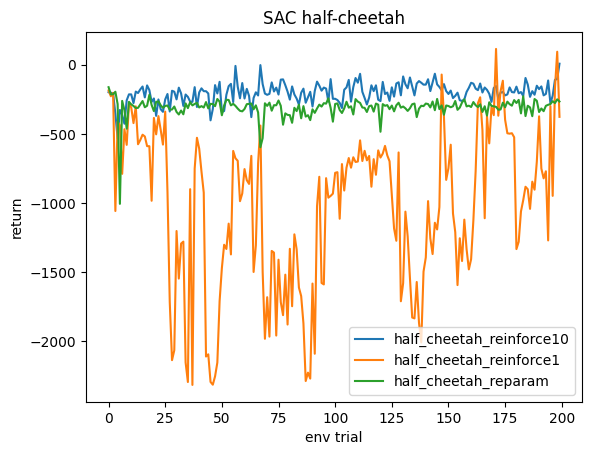

In [35]:
plt.plot(tag_data['SAC_half_cheetah_reinforce10']['eval_return'],label='half_cheetah_reinforce10')
plt.plot(tag_data['SAC_half_cheetah_reinforce1']['eval_return'],label='half_cheetah_reinforce1')
plt.plot(tag_data['SAC_half_cheetah_reparam']['eval_return'],label='half_cheetah_reparam')
plt.legend()

plt.xlabel('env trial')
plt.ylabel('return')
plt.title('SAC half-cheetah')

Text(0.5, 1.0, 'SAC humanoid')

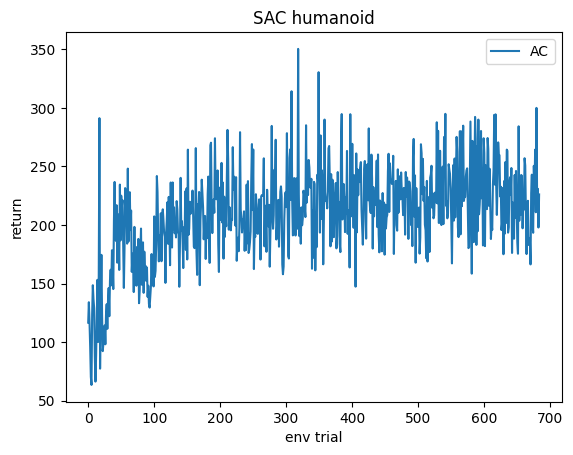

In [44]:
plt.plot(tag_data['humanoid_ac']['eval_return'],label='AC')
plt.legend()
#plt.xlim([0, 5e5])
plt.xlabel('env trial')
plt.ylabel('return')
plt.title('SAC humanoid')

Text(0.5, 1.0, 'SAC humanoid AC compared to PG')

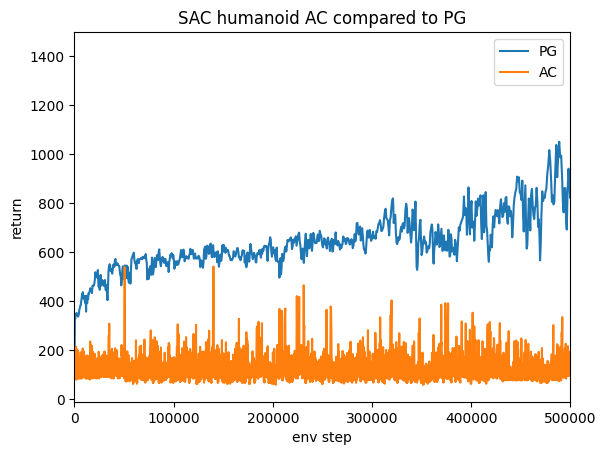

In [54]:
plt.plot(np.cumsum(tag_data['humanoid_pg']['Train_AverageReturn']),tag_data['humanoid_pg']['Train_AverageReturn'],label='PG')
plt.plot(np.cumsum(tag_data['humanoid_ac']['train_return']),tag_data['humanoid_ac']['train_return'],label='AC')
plt.legend()
plt.xlim([0, 5e5])
plt.xlabel('env step')
plt.ylabel('return')
plt.title('SAC humanoid AC compared to PG')

Text(0.5, 1.0, 'SAC hopper q-values')

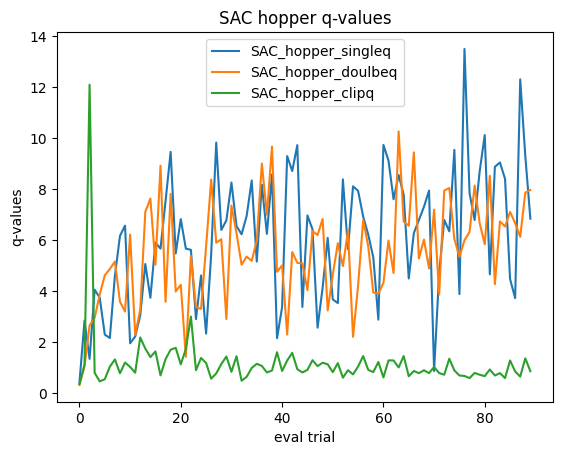

In [239]:
plt.plot(tag_data['SAC_hopper_singleq']['critic_loss'],label='SAC_hopper_singleq')
plt.plot(tag_data['SAC_hopper_doubleq']['critic_loss'],label='SAC_hopper_doulbeq')
plt.plot(tag_data['SAC_hopper_clipq']['critic_loss'],label='SAC_hopper_clipq')
plt.legend()

plt.xlabel('eval trial')
plt.ylabel('q-values')
plt.title('SAC hopper q-values')

Text(0.5, 1.0, 'SAC hopper q-values')

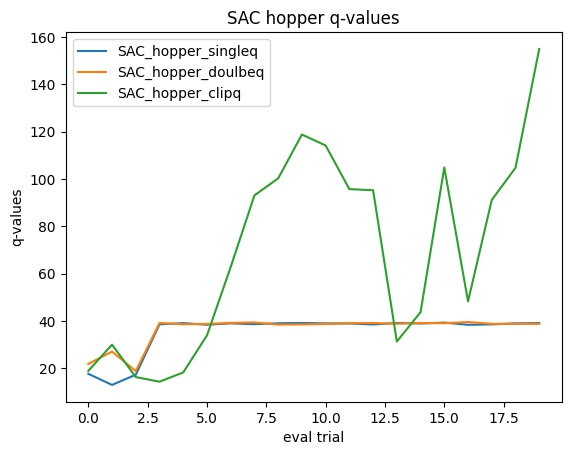

In [240]:
plt.plot(tag_data['SAC_hopper_singleq']['eval_return'],label='SAC_hopper_singleq')
plt.plot(tag_data['SAC_hopper_doubleq']['eval_return'],label='SAC_hopper_doulbeq')
plt.plot(tag_data['SAC_hopper_clipq']['eval_return'],label='SAC_hopper_clipq')
plt.legend()

plt.xlabel('eval trial')
plt.ylabel('q-values')
plt.title('SAC hopper q-values')

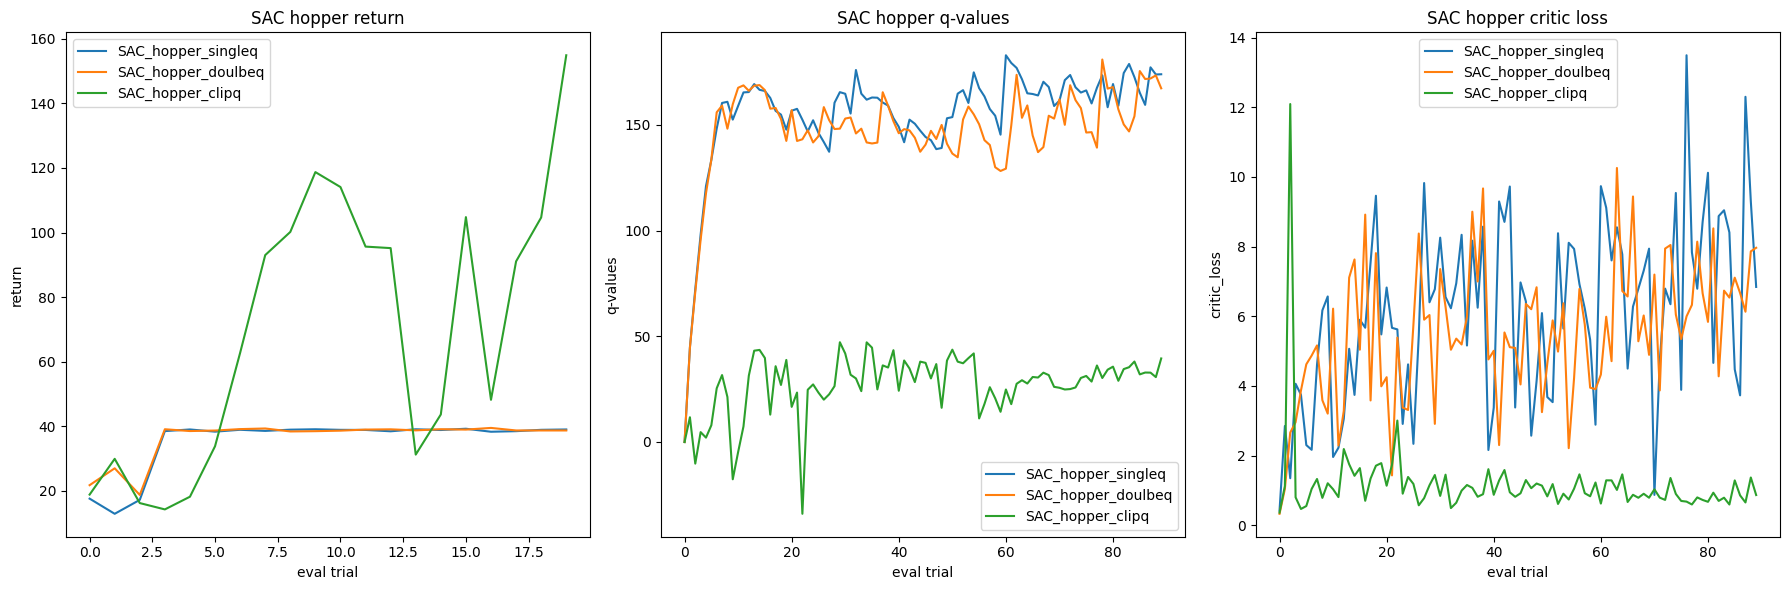

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 2 columns

# Plot for eval_return
axs[0].plot(tag_data['SAC_hopper_singleq']['eval_return'], label='SAC_hopper_singleq')
axs[0].plot(tag_data['SAC_hopper_doubleq']['eval_return'], label='SAC_hopper_doulbeq')
axs[0].plot(tag_data['SAC_hopper_clipq']['eval_return'], label='SAC_hopper_clipq')
axs[0].set_xlabel('eval trial')
axs[0].set_ylabel('return')
axs[0].set_title('SAC hopper return')
axs[0].legend()

# Plot for q_values
axs[1].plot(tag_data['SAC_hopper_singleq']['q_values'], label='SAC_hopper_singleq')
axs[1].plot(tag_data['SAC_hopper_doubleq']['q_values'], label='SAC_hopper_doulbeq')
axs[1].plot(tag_data['SAC_hopper_clipq']['q_values'], label='SAC_hopper_clipq')
axs[1].set_xlabel('eval trial')
axs[1].set_ylabel('q-values')
axs[1].set_title('SAC hopper q-values')
axs[1].legend()


# Plot for q_values
axs[2].plot(tag_data['SAC_hopper_singleq']['critic_loss'], label='SAC_hopper_singleq')
axs[2].plot(tag_data['SAC_hopper_doubleq']['critic_loss'], label='SAC_hopper_doulbeq')
axs[2].plot(tag_data['SAC_hopper_clipq']['critic_loss'], label='SAC_hopper_clipq')
axs[2].set_xlabel('eval trial')
axs[2].set_ylabel('critic_loss')
axs[2].set_title('SAC hopper critic loss')
axs[2].legend()

plt.tight_layout()
plt.show()


In [319]:
# DQN and double DQN -- lunarlander
fnames = {}
fnames['DQN-cartpole'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_17-10-2023_16-15-57/events.out.tfevents.1697584557.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-lr'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_17-10-2023_16-12-38/events.out.tfevents.1697584358.MacBook-Pro-108.ucsfmedicalcenter.org'

fnames['DQN-cartpole-double-dqn'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_doubleq_17-10-2023_17-21-05/events.out.tfevents.1697588465.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-double-dqn-lr'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.99_doubleq_17-10-2023_17-32-40/events.out.tfevents.1697589160.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['DQN-cartpole-low-discount'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_CartPole-v1_s64_l2_d0.8_17-10-2023_17-21-42/events.out.tfevents.1697588502.MacBook-Pro-108.ucsfmedicalcenter.org'



fnames['DQN1'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_16-25-42/events.out.tfevents.1697325942.MacBook-Pro-108.attlocal.net'
fnames['DQN2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_16-33-20/events.out.tfevents.1697326400.MacBook-Pro-108.attlocal.net'
fnames['DQN3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_14-10-2023_17-06-13/events.out.tfevents.1697328373.MacBook-Pro-108.attlocal.net'

fnames['DoubleDQN1']= '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_16-29-53/events.out.tfevents.1697326193.MacBook-Pro-108.attlocal.net'
fnames['DoubleDQN2']= '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_16-37-38/events.out.tfevents.1697326658.MacBook-Pro-108.attlocal.net'
fnames['DoubleDQN3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_LunarLander-v2_s64_l2_d0.99_doubleq_14-10-2023_17-06-09/events.out.tfevents.1697328369.MacBook-Pro-108.attlocal.net'

fnames['mspacman'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_14-10-2023_18-22-28/events.out.tfevents.1697332948.MacBook-Pro-108.attlocal.net'
fnames['mspacman2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_17-10-2023_18-51-41/events.out.tfevents.1697593901.breeze.cin.ucsf.edu'
fnames['mspacman3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_dqn_dqn_MsPacmanNoFrameskip-v0_d0.99_tu2000_lr0.0001_doubleq_clip10.0_17-10-2023_18-51-11/events.out.tfevents.1697593871.zephyr.cin.ucsf.edu'

# SAC
fnames['SAC_pendulum'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_pendulum_Pendulum-v1_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_13-45-04/events.out.tfevents.1697489104.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reinforce_old'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reinforce_InvertedPendulum-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_14-00-22/events.out.tfevents.1697490022.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reinforce'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reinforce_InvertedPendulum-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_18-08-15/events.out.tfevents.1697591295.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['SAC_invpendulum_reinforce_new'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reinforce_InvertedPendulum-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_19-42-46/events.out.tfevents.1697596966.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_hopper_singleq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_17-10-2023_21-36-03/events.out.tfevents.1697603763.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_doubleq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_17-10-2023_21-36-38/events.out.tfevents.1697603798.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_clipq'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_17-10-2023_21-36-24/events.out.tfevents.1697603784.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_hopper_singleq2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_17-10-2023_22-29-22/events.out.tfevents.1697606962.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_doubleq2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_17-10-2023_22-29-15/events.out.tfevents.1697606955.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_clipq2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_17-10-2023_22-29-18/events.out.tfevents.1697606958.MacBook-Pro-108.attlocal.net.ucsf.edu'



fnames['SAC_hopper_singleq3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_17-10-2023_23-03-33/events.out.tfevents.1697609013.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_doubleq3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_17-10-2023_23-03-49/events.out.tfevents.1697609029.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_clipq3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_17-10-2023_23-03-47/events.out.tfevents.1697609027.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_hopper_singleq4'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_17-10-2023_23-30-39/events.out.tfevents.1697610639.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_doubleq4'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_17-10-2023_23-30-42/events.out.tfevents.1697610642.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_clipq4'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_17-10-2023_23-30-40/events.out.tfevents.1697610640.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_hopper_singleq5'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_singlecritic_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_18-10-2023_01-16-43/events.out.tfevents.1697617003.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_doubleq5'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_doubleq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_doubleq_18-10-2023_01-15-40/events.out.tfevents.1697616940.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_hopper_clipq5'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_18-10-2023_01-15-42/events.out.tfevents.1697616942.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_hopper_clipq6'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sac_hopper_clipq_Hopper-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b256_d0.99_t0.05_stu0.005_min_18-10-2023_18-15-23/events.out.tfevents.1697678123.MacBook-Pro-108.attlocal.net'


fnames['SAC_invpendulum_reparam_n'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_16-10-2023_14-45-06/events.out.tfevents.1697492706.MacBook-Pro-108.attlocal.net'
fnames['SAC_invpendulum_reparam_n2'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_18-18-31/events.out.tfevents.1697591911.MacBook-Pro-108.ucsfmedicalcenter.org'
fnames['SAC_invpendulum_reparam_n3'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_19-42-23/events.out.tfevents.1697596943.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_invpendulum_reparam_n4'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_20-17-40/events.out.tfevents.1697599060.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_invpendulum_reparam_n5'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_sanity_invpendulum_reparametrize_InvertedPendulum-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_htu1000_17-10-2023_21-01-43/events.out.tfevents.1697601703.MacBook-Pro-108.attlocal.net.ucsf.edu'


fnames['SAC_half_cheetah_reinforce10'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_16-10-2023_19-02-45/events.out.tfevents.1697508165.MacBook-Pro-108.attlocal.net'
fnames['SAC_half_cheetah_reinforce1'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_17-10-2023_21-07-35/events.out.tfevents.1697602055.zephyr.cin.ucsf.edu'
fnames['SAC_half_cheetah_reparam'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reparametrize_HalfCheetah-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_stu0.005_17-10-2023_21-35-04/events.out.tfevents.1697603704.MacBook-Pro-108.attlocal.net.ucsf.edu'

fnames['SAC_half_cheetah_reinforce10'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_18-10-2023_00-43-27/events.out.tfevents.1697615007.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_half_cheetah_reinforce1'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce1_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_18-10-2023_00-47-44/events.out.tfevents.1697615264.MacBook-Pro-108.attlocal.net.ucsf.edu'
fnames['SAC_half_cheetah_reparam'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reparametrize_HalfCheetah-v4_reparametrize_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.1_stu0.005_18-10-2023_00-47-48/events.out.tfevents.1697615268.MacBook-Pro-108.attlocal.net.ucsf.edu'


fnames['SAC_half_cheetah_reinforce10_working'] = '/Users/donghoonshin/Desktop/Fall2023/homework_fall2023/hw3/data/hw3_sac_reinforce10_HalfCheetah-v4_reinforce_s128_l3_alr0.0003_clr0.0003_b128_d0.99_t0.2_stu0.005_15-10-2023_18-08-41/events.out.tfevents.1697418521.MacBook-Pro-108.attlocal.net'
for key in fnames.keys():
    tag_data[key] = get_section_results(fnames[key]) 
fnames.keys()

dict_keys(['DQN-cartpole', 'DQN-cartpole-lr', 'DQN-cartpole-double-dqn', 'DQN-cartpole-double-dqn-lr', 'DQN-cartpole-low-discount', 'DQN1', 'DQN2', 'DQN3', 'DoubleDQN1', 'DoubleDQN2', 'DoubleDQN3', 'mspacman', 'mspacman2', 'mspacman3', 'SAC_pendulum', 'SAC_invpendulum_reinforce_old', 'SAC_invpendulum_reinforce', 'SAC_invpendulum_reinforce_new', 'SAC_hopper_singleq', 'SAC_hopper_doubleq', 'SAC_hopper_clipq', 'SAC_hopper_singleq2', 'SAC_hopper_doubleq2', 'SAC_hopper_clipq2', 'SAC_hopper_singleq3', 'SAC_hopper_doubleq3', 'SAC_hopper_clipq3', 'SAC_hopper_singleq4', 'SAC_hopper_doubleq4', 'SAC_hopper_clipq4', 'SAC_hopper_singleq5', 'SAC_hopper_doubleq5', 'SAC_hopper_clipq5', 'SAC_hopper_clipq6', 'SAC_invpendulum_reparam_n', 'SAC_invpendulum_reparam_n2', 'SAC_invpendulum_reparam_n3', 'SAC_invpendulum_reparam_n4', 'SAC_invpendulum_reparam_n5', 'SAC_half_cheetah_reinforce10', 'SAC_half_cheetah_reinforce1', 'SAC_half_cheetah_reparam', 'SAC_half_cheetah_reinforce10_working'])

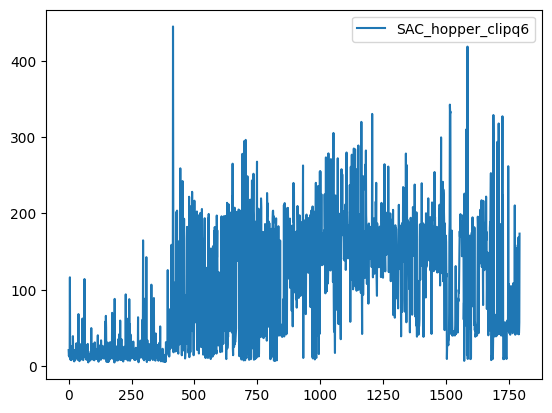

In [318]:
myplot(['SAC_hopper_clipq6'],'train_return',cumsumbit = 0)

Text(0.5, 0, 'eval trial')

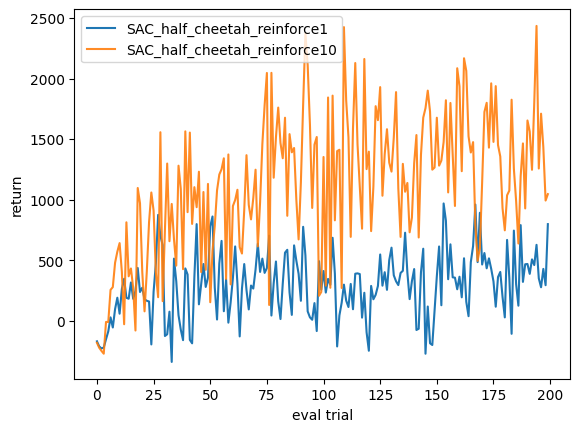

In [323]:
myplot(['SAC_half_cheetah_reinforce1','SAC_half_cheetah_reinforce10'],'eval_return',cumsumbit = 0)
plt.ylabel('return')
plt.xlabel('eval trial')

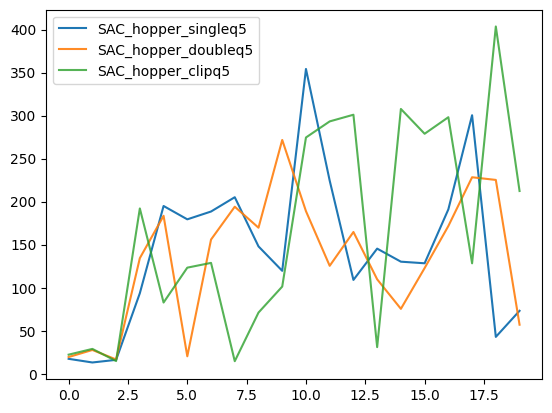

In [324]:
myplot(['SAC_hopper_singleq5','SAC_hopper_doubleq5','SAC_hopper_clipq5'],'eval_return',cumsumbit = 0)

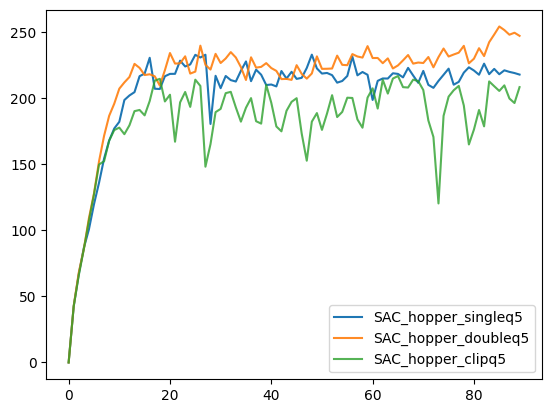

In [325]:
myplot(['SAC_hopper_singleq5','SAC_hopper_doubleq5','SAC_hopper_clipq5'],'q_values',cumsumbit = 0)

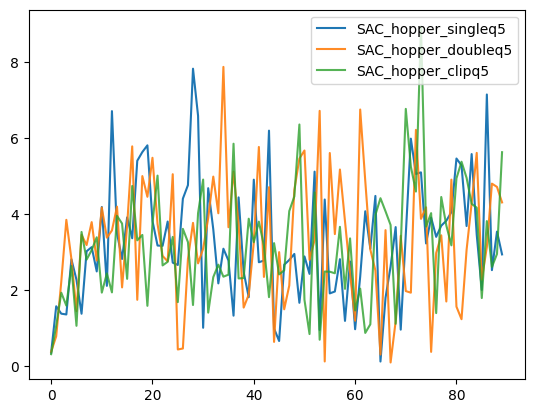

In [326]:
myplot(['SAC_hopper_singleq5','SAC_hopper_doubleq5','SAC_hopper_clipq5'],'critic_loss',cumsumbit = 0)

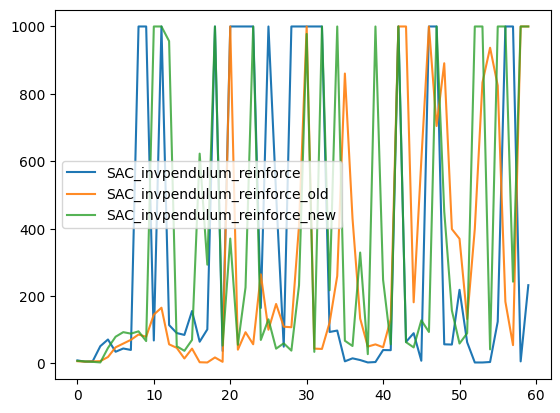

In [282]:
def myplot(data,To_plot,cumsumbit = 0):
    if cumsumbit:
        for i in range(len(data)):
            alpha_val = 1-0.1*i
            plt.plot(np.cumsum(tag_data[data[i]][To_plot]),tag_data[data[i]][To_plot],label=data[i],alpha=alpha_val)
    else:
        for i in range(len(data)):
            alpha_val = 1-0.1*i
            plt.plot(tag_data[data[i]][To_plot],label=data[i],alpha=alpha_val)
    plt.legend()
    #plt.show()

myplot(['SAC_invpendulum_reinforce','SAC_invpendulum_reinforce_old','SAC_invpendulum_reinforce_new'],'eval_return',cumsumbit = 0)




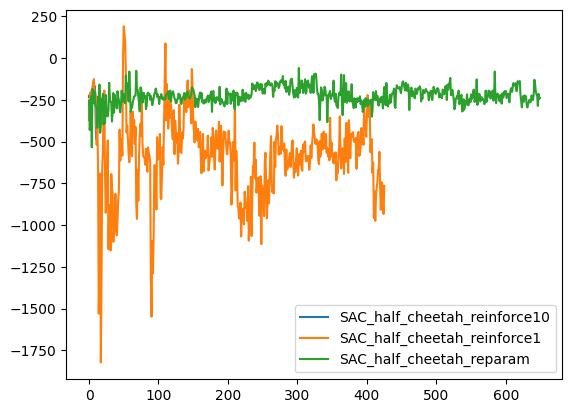

In [187]:
myplot(['SAC_half_cheetah_reinforce10','SAC_half_cheetah_reinforce1','SAC_half_cheetah_reparam'],'train_return',cumsumbit = 0)

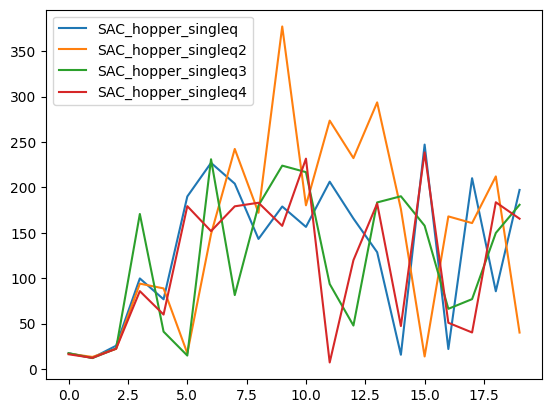

In [186]:
myplot(['SAC_hopper_singleq','SAC_hopper_singleq2','SAC_hopper_singleq3','SAC_hopper_singleq4'],'eval_return',cumsumbit = 0)

(500.0, 1000.0)

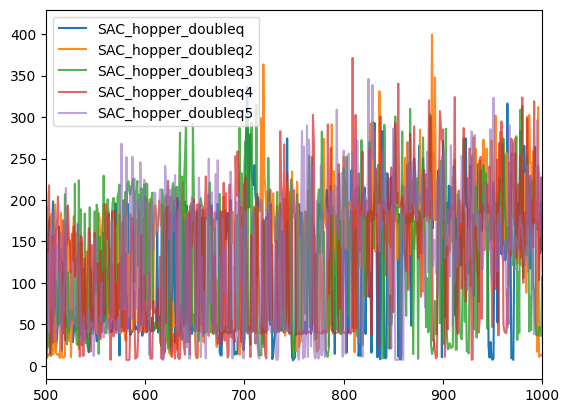

In [290]:
myplot(['SAC_hopper_doubleq','SAC_hopper_doubleq2','SAC_hopper_doubleq3','SAC_hopper_doubleq4','SAC_hopper_doubleq5'],'train_return',cumsumbit = 0)
plt.xlim([500,1000])

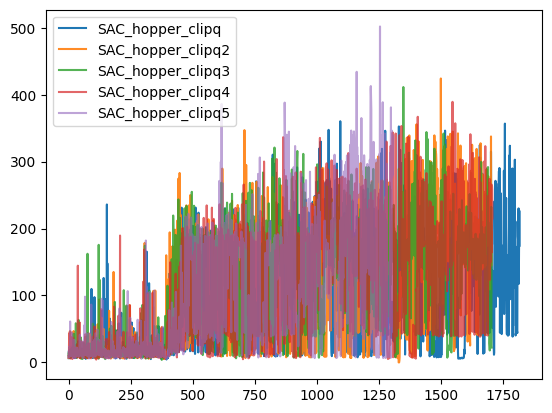

In [283]:
myplot(['SAC_hopper_clipq','SAC_hopper_clipq2','SAC_hopper_clipq3','SAC_hopper_clipq4','SAC_hopper_clipq5'],'train_return',cumsumbit = 0)
